<a href="https://colab.research.google.com/github/manilalam/cnn_project1/blob/main/Cnn_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setup and Load Data

## install Dependencies and setup

In [ ]:
import tensorflow as tf
import os

## Removing the dodgy  images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'data'

In [ ]:
os.listdir(data_dir)

['happy', 'sad', '.ipynb_checkpoints']

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext  list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

## Load Data

In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')  # build image dataset

Found 155 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

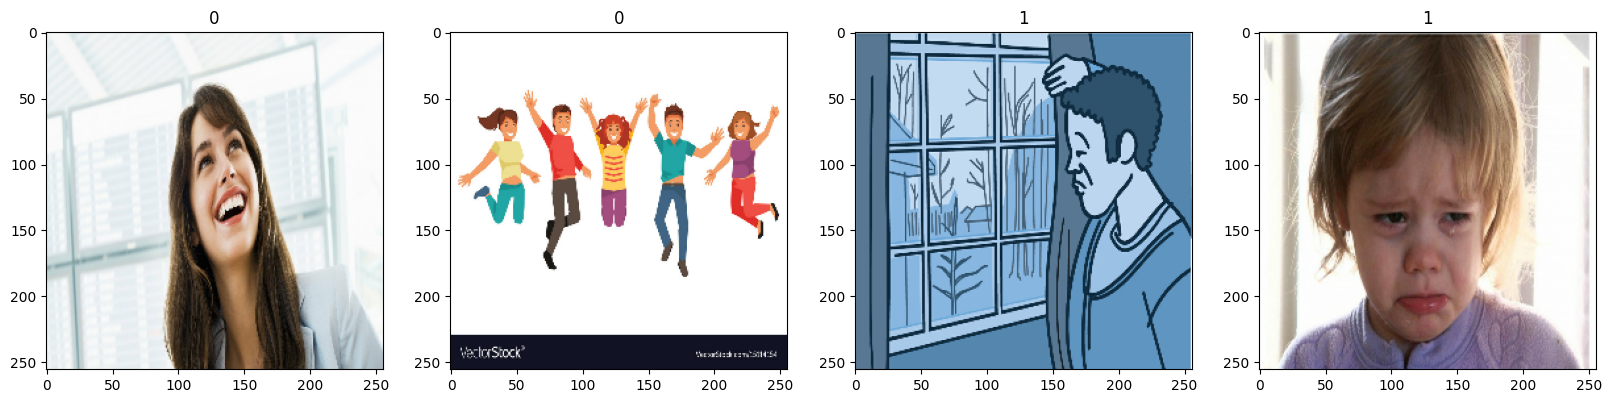

In [ ]:
fig, ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Preprocessing the Data

## Scale Data

In [ ]:
data = data.map(lambda x,y : (x/255 , y))

In [ ]:
data.as_numpy_iterator().next()

Split test and train Data


In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep Model

### Building Deep learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# TRAIN

In [ ]:
logdir= 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist =model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 13s 4s/step - loss: 1.2177 - accuracy: 0.5312 - val_loss: 0.7778 - val_accuracy: 0.6296
Epoch 2/20
3/3 [==============================] - 11s 3s/step - loss: 0.9124 - accuracy: 0.4583 - val_loss: 0.7703 - val_accuracy: 0.3704
Epoch 3/20
3/3 [==============================] - 11s 4s/step - loss: 0.6968 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.5556
Epoch 4/20
3/3 [==============================] - 11s 4s/step - loss: 0.6861 - accuracy: 0.4896 - val_loss: 0.6934 - val_accuracy: 0.3704
Epoch 5/20
3/3 [==============================] - 10s 3s/step - loss: 0.6869 - accuracy: 0.4792 - val_loss: 0.6731 - val_accuracy: 0.8148
Epoch 6/20
3/3 [==============================] - 10s 3s/step - loss: 0.6787 - accuracy: 0.7917 - val_loss: 0.6568 - val_accuracy: 0.7407
Epoch 7/20
3/3 [==============================] - 9s 3s/step - loss: 0.6406 - accuracy: 0.6354 - val_loss: 0.5584 - val_accuracy: 0.7407
Epoch 8/20
3/3 [===================

## plot performance

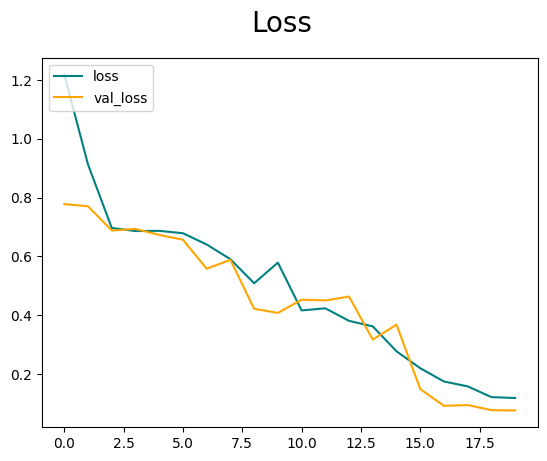

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label ='loss')
plt.plot(hist.history['val_loss'],color='orange',label ='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

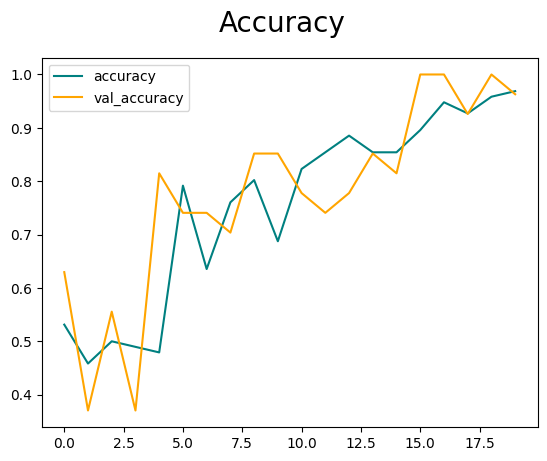

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label ='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label ='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evalute Performance

## Evalute

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)


1/1 [==============================] - 0s 479ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0, Accuracy:1.0


## Test

In [ ]:
import cv2

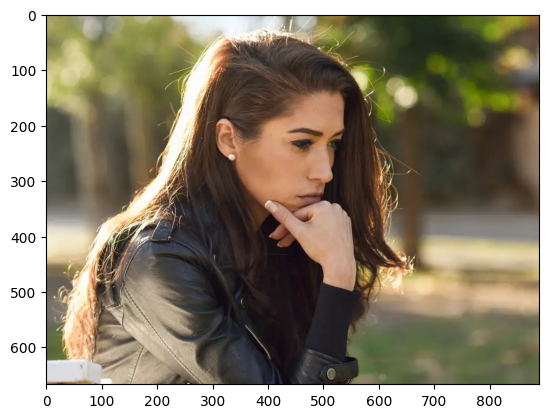

In [ ]:
img = cv2.imread("sad.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

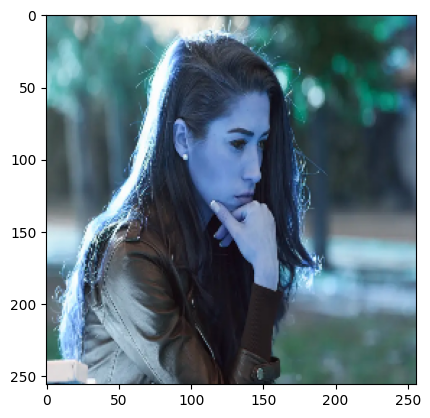

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 53ms/step


In [ ]:
yhat

array([[0.74119276]], dtype=float32)

In [ ]:
if yhat > 0.5 :
  print(f'predicted class is sad')
else:
  print(f'predicted class is happy')

predicted class is sad


# Save The Model

## save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','happysadmodel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [ ]:
y_pred = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 37ms/step


In [ ]:
if yhat > 0.5 :
  print(f'predicted class is sad')
else:
  print(f'predicted class is happy')

predicted class is sad
